# Pandas

In [1]:
import pandas as pd

### Series as a dataframe in pandas

In [97]:
S=pd.Series([9,6,5,3,3])
print(S)

0    9
1    6
2    5
3    3
4    3
dtype: int64


In [98]:
print(S.values)

[9 6 5 3 3]


In [99]:
print(S.index)

RangeIndex(start=0, stop=5, step=1)


### Create a dataframe in panda

In [100]:
fruits=["Mango","Banana","Orange","Strawberry","Blueberry"]
quantities=[40,67,92,46,78]
S=pd.Series(quantities,index= fruits)
print(S)

Mango         40
Banana        67
Orange        92
Strawberry    46
Blueberry     78
dtype: int64


In [101]:
#sum of two series
fruits=["Mango","Banana","Orange","Strawberry","Blueberry"]
quantities=[40,67,92,46,78]
price=[400,867,453,653,900]
S=pd.Series(quantities,fruits)
S2=pd.Series(price,fruits)
print(S+S2)

Mango         440
Banana        934
Orange        545
Strawberry    699
Blueberry     978
dtype: int64


In [102]:
#Series addition with different indices
#if the indices doesent match, the series output will be 'NaN'
fruits1=["Apple","Banana","Cherries","kiwi","Mango"]
fruits2=["Berries","Mango","Apple","lemon","Cherries"]
Q1=[12,45,23,67,33]
Q2=[78,34,67,21,87]
S1=pd.Series(Q1,index=fruits1)
S2=pd.Series(Q2,index=fruits2)
print(S1+S2)

Apple        79.0
Banana        NaN
Berries       NaN
Cherries    110.0
Mango        67.0
kiwi          NaN
lemon         NaN
dtype: float64


### Series Indexing

In [103]:
#Single Indexing
S1[["Apple"]]

Apple    12
dtype: int64

In [104]:
#Multiple Indexing
S2[["Berries","Mango","Apple","lemon"]]

Berries    78
Mango      34
Apple      67
lemon      21
dtype: int64

### Series Apply

In [105]:
#Apply log function to series
import numpy as np
print(S1)
S1.apply(np.log)

Apple       12
Banana      45
Cherries    23
kiwi        67
Mango       33
dtype: int64


Apple       2.484907
Banana      3.806662
Cherries    3.135494
kiwi        4.204693
Mango       3.496508
dtype: float64

In [106]:
#Apply lambda function to series
print(S1)
S1.apply(lambda x: x if x>40 else x+10)   #note= lambda cant contain any assign operator.avoid using =

Apple       12
Banana      45
Cherries    23
kiwi        67
Mango       33
dtype: int64


Apple       22
Banana      45
Cherries    33
kiwi        67
Mango       43
dtype: int64

In [107]:
#Conditioning in Series
S1[S1>30]

Banana    45
kiwi      67
Mango     33
dtype: int64

In [108]:
"kiwi" in S1

True

In [109]:
###Create Cities from dictionaries
city={"delhi":457785,
      "lucknow":876874,
      "mumbai":699689
     }
print(city)
print("")
city_series=pd.Series(city)
print(city_series)

{'delhi': 457785, 'lucknow': 876874, 'mumbai': 699689}

delhi      457785
lucknow    876874
mumbai     699689
dtype: int64


### Handling missing data in pandas

In [110]:
#if we add new data to existing series and match it with new added date series it can find null values
new_city={"delhi":56867,"lucknow":6865675,"ahmedabad":489589}
new_city_series=pd.Series(new_city)

print("first city: \n",city_series)
print("")
print("new city: \n",new_city_series)
print("")

new_city_series=pd.Series(city,index=new_city)
print("added both cities to find missing values: \n",new_city_series)  #it will not include value of 'ahmedabad' bcs first city series doesnt have 'ahmedabad' value

first city: 
 delhi      457785
lucknow    876874
mumbai     699689
dtype: int64

new city: 
 delhi          56867
lucknow      6865675
ahmedabad     489589
dtype: int64

added both cities to find missing values: 
 delhi        457785.0
lucknow      876874.0
ahmedabad         NaN
dtype: float64


In [111]:
#check for null values
print(new_city_series.isnull())

delhi        False
lucknow      False
ahmedabad     True
dtype: bool


In [112]:
print(new_city_series.notnull())

delhi         True
lucknow       True
ahmedabad    False
dtype: bool


In [113]:
#drop the null values
print(new_city_series.dropna())

delhi      457785.0
lucknow    876874.0
dtype: float64


In [114]:
#fill null values
print(new_city_series.fillna(85768))

delhi        457785.0
lucknow      876874.0
ahmedabad     85768.0
dtype: float64


In [115]:
#fill null values via appending another series
missing_city={"ahmedabad":755854}
new_city_series.fillna(missing_city)

delhi        457785.0
lucknow      876874.0
ahmedabad    755854.0
dtype: float64

In [116]:
#convert data to int type
print(new_city_series.fillna(437892).astype(int))

delhi        457785
lucknow      876874
ahmedabad    437892
dtype: int32


### DataFrames

In [117]:
import pandas as pd
df=pd.DataFrame({"Movie": ["ABCD","Laxmi","Avengers","Blackmail"],"Genre": ["Drama","drama","sci-fi","comedy"]})
df

,Movie,Genre
0,ABCD,Drama
1,Laxmi,drama
2,Avengers,sci-fi
3,Blackmail,comedy


In [118]:
import pandas as pd
df=pd.read_csv("F:\Datasets\sample.csv",encoding= 'unicode_escape')
df

,Unnamed: 0,Cars_per_cap,country,drives_right
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [119]:
#index_col=# sets the index column to column no #
df=pd.read_csv("F:\Datasets\sample.csv",index_col=0,encoding= 'unicode_escape')    
df

,Cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


### Subsetting Columns

In [120]:
df["country"]

US     United States
AUS        Australia
JAP            Japan
IN             India
RU            Russia
MOR          Morocco
EG             Egypt
Name: country, dtype: object

In [121]:
df[["Cars_per_cap","drives_right"]]

,Cars_per_cap,drives_right
US,809,True
AUS,731,False
JAP,588,False
IN,18,False
RU,200,True
MOR,70,True
EG,45,True


### Subsetting rows

In [122]:
df[0:2]

,Cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False


In [123]:
df[1:2]

,Cars_per_cap,country,drives_right
AUS,731,Australia,False


In [124]:
df[0:6]

,Cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True


### loc method to subset row and column altogether

 loc : uses names of lables   |              syntax: loc[ row, col ]

In [45]:
df.loc[['US','JAP'],'country']

US     United States
JAP            Japan
Name: country, dtype: object

#### iloc method

iloc: uses indexes of labels | syntax: iloc[row index, col index]

In [46]:
df.iloc[[0,1,2],2]

US      True
AUS    False
JAP    False
Name: drives_right, dtype: bool

### Subsetting using conditions

Steps:

    1.obtain column of interest    
    2.convert it into boolean using condition    
    3.surround it with dataframe's name

In [50]:
df["Cars_per_cap"]

US     809
AUS    731
JAP    588
IN      18
RU     200
MOR     70
EG      45
Name: Cars_per_cap, dtype: int64

In [51]:
df["Cars_per_cap"]>300

US      True
AUS     True
JAP     True
IN     False
RU     False
MOR    False
EG     False
Name: Cars_per_cap, dtype: bool

In [52]:
df[df["Cars_per_cap"]>300]

,Cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False


In [53]:
df[df["drives_right"]==True]

,Cars_per_cap,country,drives_right
US,809,United States,True
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


#### Subsetting via two conditions

Look carefully for syntax

In [60]:
#cond1 AND cond2  (both cond should be true)
df[(df["drives_right"]==True) & (df["Cars_per_cap"]>70)]

,Cars_per_cap,country,drives_right
US,809,United States,True
RU,200,Russia,True


In [61]:
#cond1 OR cond2   (any one condition should be true)
df[(df["drives_right"]==True) | (df["Cars_per_cap"]>70)]

,Cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


### Read tabular data files in pandas

In [2]:
import pandas as pd
orders=pd.read_table("http://bit.ly/chiporders")

In [3]:
#first five rows
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
#first 15 rows
orders.head(15)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
#last five rows
orders.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


### Groupby method

In [6]:
orders.groupby('quantity')["order_id"].max()

quantity
1     1834
2     1822
3     1671
4     1786
5      970
7     1443
8     1559
10    1660
15    1443
Name: order_id, dtype: int64

In [7]:
orders.groupby(['item_name','quantity'])["order_id"].max()

item_name              quantity
6 Pack Soft Drink      1           1803
                       2           1360
Barbacoa Bowl          1           1825
Barbacoa Burrito       1           1827
Barbacoa Crispy Tacos  1           1330
                                   ... 
Veggie Crispy Tacos    1            668
Veggie Salad           1           1635
Veggie Salad Bowl      1           1818
Veggie Soft Tacos      1           1132
                       2           1559
Name: order_id, Length: 103, dtype: int64

### Alternative method for groupby: Pivot table

In [8]:
orders.pivot_table(index=['item_name','quantity'],values='order_id',aggfunc='max')

order_id
item_name             quantity          
6 Pack Soft Drink     1             1803
                      2             1360
Barbacoa Bowl         1             1825
Barbacoa Burrito      1             1827
Barbacoa Crispy Tacos 1             1330
...                                  ...
Veggie Crispy Tacos   1              668
Veggie Salad          1             1635
Veggie Salad Bowl     1             1818
Veggie Soft Tacos     1             1132
                      2             1559

[103 rows x 1 columns]

###### alternative options to read a csv file :

In [130]:
s1=pd.read_table("F:\Datasets\sample.csv",sep=',')
s1

,Unnamed: 0,Cars_per_cap,country,drives_right
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [71]:
df=pd.read_csv("F:\Datasets\sample.csv")    
df

,Unnamed: 0,Cars_per_cap,country,drives_right
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [73]:
s1.country

0    United States
1        Australia
2            Japan
3            India
4           Russia
5          Morocco
6            Egypt
Name: country, dtype: object

In [74]:
s1.shape

(7, 4)

In [2]:
import pandas as pd
movies=pd.read_csv("https://bit.ly//imdbratings")

In [3]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
movies.content_rating.nunique()

12

In [5]:
movies.content_rating.unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [6]:
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [7]:
movies.describe(include="all")

,star_rating,title,content_rating,genre,duration,actors_list
count,979.000000,979,976,979,979.000000,979
unique,NaN,975,12,16,NaN,969
top,NaN,True Grit,R,Drama,NaN,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,NaN,2,460,278,NaN,6
mean,7.889785,NaN,NaN,NaN,120.979571,NaN
std,0.336069,NaN,NaN,NaN,26.218010,NaN
min,7.400000,NaN,NaN,NaN,64.000000,NaN
25%,7.600000,NaN,NaN,NaN,102.000000,NaN
50%,7.800000,NaN,NaN,NaN,117.000000,NaN
75%,8.100000,NaN,NaN,NaN,134.000000,NaN


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [9]:
movies.shape

(979, 6)

In [10]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

### Rename columns in dataframe

In [11]:
ex=pd.read_csv("F:\Datasets\sample.csv")
ex

,Unnamed: 0,Cars_per_cap,country,drives_right
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [12]:
ex.columns

Index(['Unnamed: 0', 'Cars_per_cap', 'country', 'drives_right'], dtype='object')

In [23]:
#RENAME METHOD
ex.rename(columns={'Cars_per_cap':'Cars'})

,Unnamed: 0,Cars,country,drives_right
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [25]:
ex.rename(columns={'Unnamed: 0':'shortforms'})

,shortforms,Cars_per_cap,country,drives_right
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [29]:
#REPLACE ALL COLUMN NAMES BY OVERWRITING COLUMN NAMES
new_cols=['col1','col2','col3','col4']
ex.columns=new_cols
ex

,col1,col2,col3,col4
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [47]:
#REPLACE COL NAMES WHILE READING CSVFILE
ex=pd.read_csv("F:\Datasets\sample.csv", names=new_cols)
ex

,col1,col2,col3,col4
0,NaN,Cars_per_cap,country,drives_right
1,US,809,United States,TRUE
2,AUS,731,Australia,FALSE
3,JAP,588,Japan,FALSE
4,IN,18,India,FALSE
5,RU,200,Russia,TRUE
6,MOR,70,Morocco,TRUE
7,EG,45,Egypt,TRUE


In [56]:
#REPLACE STR FROM COLUMN NAME
ex.columns=ex.columns.str.replace('col',' ')
ex.columns

Index([' 1', ' 2', ' 3', ' 4'], dtype='object')

### Remove columns from dataframe

In [13]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [14]:
#REMOVE SINGLE COLUMN    (axis=1 refers to column)
movies.drop('star_rating',axis=1)

,title,content_rating,genre,duration,actors_list
0,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...
974,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [15]:
#REMOVE MULTIPLE COLUMNS AT ONCE
movies.drop(['duration','actors_list'],axis=1)

,star_rating,title,content_rating,genre
0,9.3,The Shawshank Redemption,R,Crime
1,9.2,The Godfather,R,Crime
2,9.1,The Godfather: Part II,R,Crime
3,9.0,The Dark Knight,PG-13,Action
4,8.9,Pulp Fiction,R,Crime
...,...,...,...,...
974,7.4,Tootsie,PG,Comedy
975,7.4,Back to the Future Part III,PG,Adventure
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action
977,7.4,Poltergeist,PG,Horror


In [16]:
#RESET INDEX
movies.reset_index()

,index,star_rating,title,content_rating,genre,duration,actors_list
0,0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...,...
974,974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [17]:
movies.reset_index(drop = True)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


### Sorting dataframes

In [18]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [19]:
#sorting column star_rating in asceding order   syntax: df.col_name.sort_values().head()
movies.star_rating.sort_values(ascending=True).head(10)

978    7.4
950    7.4
949    7.4
948    7.4
947    7.4
946    7.4
945    7.4
944    7.4
943    7.4
942    7.4
Name: star_rating, dtype: float64

In [20]:
#sorting in descending order
movies.star_rating.sort_values(ascending=False).head(10)

0    9.3
1    9.2
2    9.1
3    9.0
6    8.9
8    8.9
7    8.9
9    8.9
5    8.9
4    8.9
Name: star_rating, dtype: float64

In [21]:
movies.title.sort_values().head(10)

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
910                     2046
596                 21 Grams
624                25th Hour
708         28 Days Later...
60                  3 Idiots
Name: title, dtype: object

In [73]:
#sort first by star_rating and then by duration
movies.sort_values(['star_rating','duration'],ascending=False).head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


### filter rows of dataframe

Goal: Filter dataframe to show rows that only have duration greater than 500

In [84]:
l=[]
for i in movies.duration:
    if i>100:
        l.append(True)
    else:
        l.append(False)

In [85]:
#examine first 5 elements
l[0:6]

[True, True, True, True, True, False]

In [86]:
#Covert list into Series
ser=pd.Series(l)
ser.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [89]:
#WITHOUT WRITING LOOP
movies[movies.duration>=200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [90]:
#select only a specific column "genre"
movies[movies.duration>=200].genre

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

### Apply Multiple filters in row

In [91]:
movies[(movies.duration>=200) & (movies.genre=='Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [92]:
movies[(movies.duration>=200) | (movies.genre=='Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
...,...,...,...,...,...,...
958,7.4,My Sister's Keeper,PG-13,Drama,109,"[u'Cameron Diaz', u'Abigail Breslin', u'Alec B..."
968,7.4,The English Patient,R,Drama,162,"[u'Ralph Fiennes', u'Juliette Binoche', u'Will..."
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."


Goal: Filter movies with "genre" 'crime','drama' and 'adventure'

In [93]:
#"isin" Method
movies[movies.genre.isin(['Drama','Adventure','Crime'])].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."


### String Methods in pandas

In [139]:
orders=pd.read_table("http://bit.ly//chiporders")
orders

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [140]:
#UPPER & LOWER
orders.item_name.str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

### Change datatype of panda series

In [12]:
import pandas as pd
orders=pd.read_table("http://bit.ly//chiporders")
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [14]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [13]:
#ASTYPE METHOD
orders.item_price.str.replace('$',' ').astype(float).mean()

7.464335785374397

In [17]:
#CONTAINS METHOD
orders.item_name.str.contains("Chicken Bowl").head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [22]:
#Compute a crosstabulation
pd.crosstab(orders.order_id,orders.item_name).head()

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Histogram

In [23]:
%matplotlib inline

In [32]:
import pandas as pd
movies=pd.read_csv("http://bit.ly/imdbratings")
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


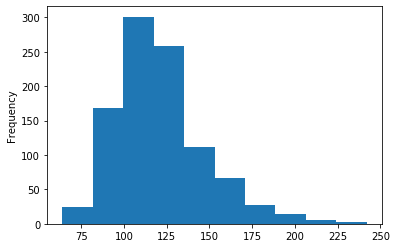

In [33]:
movies.duration.plot(kind='hist')

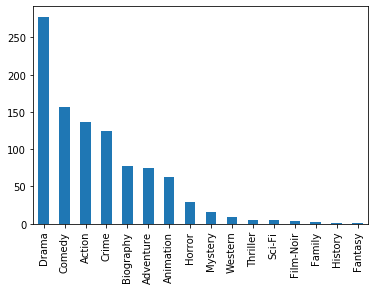

In [35]:
movies.genre.value_counts().plot(kind='bar')

### Create dummy variables in panda series

In [39]:
train=pd.read_csv("http://bit.ly/kaggletrain")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
#create sex_male dummy variable using sex method
train['sex_male']=train.Sex.map({'female':0,'male':1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [43]:
#ALTERNATIVE: "get_dummies" method to create one column for every possible value
pd.get_dummies(train.Sex,drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


#### Note: 
if you have "K" possible values, you only need "K-1" dummy variables ||
you can drop the first dummy variable using "drop_first"

In [45]:
pd.get_dummies(train.Embarked,prefix='Embarked').head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [49]:
pd.get_dummies(train,columns=['Sex','Embarked'],drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,sex_male,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,1,0,1
